<a href="https://colab.research.google.com/github/sadbacon1148/DataCleansingWithSpark/blob/master/Data_Cleansing_with_Spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleansing with Spark

### Data Dictionary
https://archive.ics.uci.edu/ml/datasets/Online+Retail

This is a transactional data set which contains all the transactions occurring between 01/12/2018 and 09/12/2019 for a UK-based and registered non-store online retail.

The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
- UnitPrice: Unit price. Numeric, Product price per unit in sterling.
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal, the name of the country where each customer resides.


## Install Pyspark


* ดึง openjdk มาติดตั้ง
มันคือ prerequisite สำหรับรัน spark/java

* wget ก็เหมือน get แต่รันมาคนละแบบ 
เรามี url มาอยู่แล้วก็คือเอามาได้เลย

* tar xzvf ก็คือ unzip

* pip install ก็คือการติดตั้งแต่สำหรับ python packages อย่างเดียว 
ติดตั้งสิ่งที่ชื่อว่า findspark ซึ่งเอาไว้ใช้กับ spark ได้

In [ ]:
# ลง Spark ใน Google Colab
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!tar xzvf spark-2.4.5-bin-hadoop2.7.tgz
!pip install -q findspark==1.3.0

spark-2.4.5-bin-hadoop2.7/
spark-2.4.5-bin-hadoop2.7/licenses/
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-jtransforms.html
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-zstd.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-zstd-jni.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-xmlenc.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-vis.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-spire.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-sorttable.js.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-slf4j.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-scopt.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-scala.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-sbt-launch-lib.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-respond.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-reflectasm.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-pyrolite.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-py4j.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-protobuf.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-pmml-model

In [ ]:
# Set enviroment variable ให้รู้จัก Spark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"

In [ ]:
# ลง pyspark ผ่านคำสั่ง pip
!pip install pyspark==2.4.5

#### ใช้งาน Spark

ใช้ `local[*]` เพื่อเปิดการใช้งานการประมวลผลแบบ multi-core. Spark จะใช้ CPU ทุก core ที่อนุญาตให้ใช้งานในเครื่อง.

**การที่เรา initialise ขึ้นมาครั้งแรกเราสามารถเลือกได้ว่าจะใช้กี่ทั้งหมดกี่ core ในการ run spark** 

**ซึ่งสมมติว่าเราซื้อคอมมางี้ มี 4 cores เราก็สามารถบอกได้ว่าให้ spark run แค่ 2 cores ที่เหลือจะเอาไว้ใช้งานอย่างอื่นอย่างงี้เปนต้น ก็สามารถทำได้**

In [ ]:
# Server ของ Google Colab มีกี่ Core
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2200.000
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa itlb_multihit
bogomips	: 4400.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits 

In [ ]:
# สร้าง Spark Session เพราะทุกครั้งที่จะใช้ก้ต้องสร้าง new session ตลอด
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()  # * here means use all the cores but normally we'll put a number instead

In [ ]:
# Get Python version
import sys
sys.version_info

sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)

In [ ]:
# Get Spark version
spark.version

'2.4.5'

#### Link with your Google Drive

In [ ]:
# เชื่อมต่อ Google colab กับ Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load data


ใช้คำสั่ง `spark.read.csv` เพื่ออ่านข้อมูลจากไฟล์ CSV

Arguments:

**Header = True << บอกให้ Spark รู้ว่าบรรทัดแรกในไฟล์ CSV เป็น Header**


**Inferschema = True << บอกให้ Spark พยายามเดาว่าแต่ละ column มี type เป็นอะไร ถ้าตั้งเป็น False, ทุก column จะถูกอ่านเป็น string**

In [ ]:
dt = spark.read.csv('/content/OnlineRetailWS2.csv', header = True, inferSchema = False, )

### Data Profiling

Data Profiling is a process of analysing summary of the data.

Example: max, min, average, sum, how many missing values etc.

#### Data

> Columns
- InvoiceNo
- StockCode
- Description
- Quantity
- InvoiceDate
- UnitPrice
- CustomerID
- Country

In [ ]:
dt

DataFrame[InvoiceNo: string, StockCode: string, Description: string, Quantity: string, InvoiceDate: string, UnitPrice: string, CustomerID: string, Country: string]

In [ ]:
dt.show()

+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|    InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|1/12/2018 08:26|     2.55|   17850.0|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|1/12/2018 08:26|     3.39|   17850.0|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|1/12/2018 08:26|     2.75|   17850.0|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|1/12/2018 08:26|     3.39|   17850.0|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|1/12/2018 08:26|     3.39|   17850.0|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|1/12/2018 08:26|     7.65|   17850.0|United Kingdom|
|   536365|    21730|GLASS STAR FROSTE...|       6|1/12/2018 08:

In [ ]:
dt.show(100)

+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|    InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|1/12/2018 08:26|     2.55|   17850.0|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|1/12/2018 08:26|     3.39|   17850.0|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|1/12/2018 08:26|     2.75|   17850.0|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|1/12/2018 08:26|     3.39|   17850.0|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|1/12/2018 08:26|     3.39|   17850.0|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|1/12/2018 08:26|     7.65|   17850.0|United Kingdom|
|   536365|    21730|GLASS STAR FROSTE...|       6|1/12/2018 08:

In [ ]:
# Show Schema
dt.dtypes

[('InvoiceNo', 'string'),
 ('StockCode', 'string'),
 ('Description', 'string'),
 ('Quantity', 'string'),
 ('InvoiceDate', 'string'),
 ('UnitPrice', 'string'),
 ('CustomerID', 'string'),
 ('Country', 'string')]

In [ ]:
# Show Schema (อีกแบบ)
dt.printSchema()

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: string (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: string (nullable = true)
 |-- CustomerID: string (nullable = true)
 |-- Country: string (nullable = true)



In [ ]:
# นับจำนวน row และ column
print((dt.count(), len(dt.columns)))

(149561, 8)


In [ ]:
# สรุปข้อมูลสถิติ เหมือน pandas เบย
# ใน column ที่มี string, min ก็จะเริ่มจาก 0-9 ไป a-z ก็คือหาประโยชน์ไม่ค่อยได้นั่นเอง5555
dt.describe().show()

+-------+------------------+-----------------+--------------------+-----------------+---------------+------------------+------------------+--------------+
|summary|         InvoiceNo|        StockCode|         Description|         Quantity|    InvoiceDate|         UnitPrice|        CustomerID|       Country|
+-------+------------------+-----------------+--------------------+-----------------+---------------+------------------+------------------+--------------+
|  count|            149561|           149561|              148988|           149561|         149561|            149561|            103168|        149561|
|   mean|  542667.691566823| 29025.9795532711|                null| 9.03069650510494|           null|5.1588385341107434|15293.393843052108|          null|
| stddev|3709.7036750049924|19003.58653750708|                null|276.7129430695507|           null|102.80134569861923|1734.9537400932984|          null|
|    min|            536365|            10002| 4 PURPLE FLOCK D...|   

In [ ]:
# สรุปข้อมูลสถิติ
dt.summary().show()

+-------+------------------+-----------------+--------------------+-----------------+---------------+------------------+------------------+--------------+
|summary|         InvoiceNo|        StockCode|         Description|         Quantity|    InvoiceDate|         UnitPrice|        CustomerID|       Country|
+-------+------------------+-----------------+--------------------+-----------------+---------------+------------------+------------------+--------------+
|  count|            149561|           149561|              148988|           149561|         149561|            149561|            103168|        149561|
|   mean|  542667.691566823| 29025.9795532711|                null| 9.03069650510494|           null|5.1588385341107434|15293.393843052108|          null|
| stddev|3709.7036750049924|19003.58653750708|                null|276.7129430695507|           null|102.80134569861923|1734.9537400932984|          null|
|    min|            536365|            10002| 4 PURPLE FLOCK D...|   

In [ ]:
# สรุปข้อมูลสถิติเฉพาะ column ที่ระบุ ก็จะเสียเวลา run น้อยลง
dt.select("Quantity", "UnitPrice").describe().show()

+-------+-----------------+------------------+
|summary|         Quantity|         UnitPrice|
+-------+-----------------+------------------+
|  count|           149561|            149561|
|   mean| 9.03069650510494|5.1588385341107434|
| stddev|276.7129430695507|102.80134569861923|
|    min|               -1|               0.0|
|    max|               99|            966.92|
+-------+-----------------+------------------+



### Preview Summarize Data of Quantity Column



In [ ]:
#median = 50% of quartile
dt.select("Quantity").summary().show()

+-------+-----------------+
|summary|         Quantity|
+-------+-----------------+
|  count|           149561|
|   mean| 9.03069650510494|
| stddev|276.7129430695507|
|    min|               -1|
|    25%|              1.0|
|    50%|              3.0|
|    75%|             10.0|
|    max|               99|
+-------+-----------------+



In [ ]:
# .collect() จะเก็บไว้ในvariable แทน จะไม่ print ออกมา 
# [5] คือ row 5

dt.select("Quantity").summary().collect()[5]

Row(summary='50%', Quantity='3.0')

In [ ]:
# ทีนี้เราอยากได้ value 3 อย่างเดียว เราก็ใส่ชื่อ column ได้เลย (Quantity)
x = dt.select("Quantity").summary().collect()[5]['Quantity'] # พอเอามาใส่ variable เราก็เอามันมาทำอย่างอื่นได้เพราะ x=3.0
x

'3.0'

## EDA - Exploratory Data Analysis

### Non-Graphical EDA

In [ ]:
# Select text-based information # if invoiceno starts w/ C = Order Cancelled # minus sign at quantity column as well
dt.where(dt['Quantity'] < 0).show()

+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|    InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|  C536379|        D|            Discount|      -1|1/12/2018 09:41|     27.5|   14527.0|United Kingdom|
|  C536383|   35004C|SET OF 3 COLOURED...|      -1|1/12/2018 09:49|     4.65|   15311.0|United Kingdom|
|  C536391|    22556|PLASTERS IN TIN C...|     -12|1/12/2018 10:24|     1.65|   17548.0|United Kingdom|
|  C536391|    21984|PACK OF 12 PINK P...|     -24|1/12/2018 10:24|     0.29|   17548.0|United Kingdom|
|  C536391|    21983|PACK OF 12 BLUE P...|     -24|1/12/2018 10:24|     0.29|   17548.0|United Kingdom|
|  C536391|    21980|PACK OF 12 RED RE...|     -24|1/12/2018 10:24|     0.29|   17548.0|United Kingdom|
|  C536391|    21484|CHICK GREY HOT WA...|     -12|1/12/2018 10:

### Exercise: 
1. ลองเลือก Quantity ระหว่าง 50 - 120
2. ลองเลือก UnitPrice ระหว่าง 0.1 - 0.5
3. Quantity ระหว่าง 50 - 120 และ UnitPrice ระหว่าง 0.1 - 0.5

In [ ]:
#metry
dt.where((dt['Quantity']<=120) & (50<=dt["Quantity"])).show()

+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|    InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|   536371|    22086|PAPER CHAIN KIT 5...|      80|1/12/2018 09:00|     2.55|   13748.0|United Kingdom|
|   536376|    21733|RED HANGING HEART...|      64|1/12/2018 09:32|     2.55|   15291.0|United Kingdom|
|   536378|    21212|PACK OF 72 RETROS...|     120|1/12/2018 09:37|     0.42|   14688.0|United Kingdom|
|   536378|   85071B|RED CHARLIE+LOLA ...|      96|1/12/2018 09:37|     0.38|   14688.0|United Kingdom|
|   536382|    22381|TOY TIDY PINK POL...|      50|1/12/2018 09:45|     1.85|   16098.0|United Kingdom|
|   536386|   85099C|JUMBO  BAG BAROQU...|     100|1/12/2018 09:57|     1.65|   16029.0|United Kingdom|
|   536386|   85099B|JUMBO BAG RED RET...|     100|1/12/2018 09:

In [ ]:
# TODO: 1. Quantity 50 - 120
dt.where( (dt['Quantity'] > 50) & (dt['Quantity'] < 120) ).show()

+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|    InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|   536371|    22086|PAPER CHAIN KIT 5...|      80|1/12/2018 09:00|     2.55|   13748.0|United Kingdom|
|   536376|    21733|RED HANGING HEART...|      64|1/12/2018 09:32|     2.55|   15291.0|United Kingdom|
|   536378|   85071B|RED CHARLIE+LOLA ...|      96|1/12/2018 09:37|     0.38|   14688.0|United Kingdom|
|   536386|   85099C|JUMBO  BAG BAROQU...|     100|1/12/2018 09:57|     1.65|   16029.0|United Kingdom|
|   536386|   85099B|JUMBO BAG RED RET...|     100|1/12/2018 09:57|     1.65|   16029.0|United Kingdom|
|   536390|   85123A|WHITE HANGING HEA...|      64|1/12/2018 10:19|     2.55|   17511.0|United Kingdom|
|   536390|    22197|SMALL POPCORN HOLDER|     100|1/12/2018 10:

In [ ]:
# TODO: 2. UnitPrice 0.1 - 0.5
dt.where( (dt['UnitPrice'] >= 0.1) & (dt['UnitPrice'] <= 0.5) ).show()

+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|    InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|   536370|    22540|MINI JIGSAW CIRCU...|      24|1/12/2018 08:45|     0.42|   12583.0|        France|
|   536370|    22544|MINI JIGSAW SPACEBOY|      24|1/12/2018 08:45|     0.42|   12583.0|        France|
|   536378|    21212|PACK OF 72 RETROS...|     120|1/12/2018 09:37|     0.42|   14688.0|United Kingdom|
|   536378|   85071B|RED CHARLIE+LOLA ...|      96|1/12/2018 09:37|     0.38|   14688.0|United Kingdom|
|   536388|    22915|ASSORTED BOTTLE T...|      12|1/12/2018 09:59|     0.42|   16250.0|United Kingdom|
|   536390|    20668|DISCO BALL CHRIST...|     288|1/12/2018 10:19|      0.1|   17511.0|United Kingdom|
|   536390|    21786|  POLKADOT RAIN HAT |     144|1/12/2018 10:

In [ ]:
# TODO: 3. Quantity 50 - 120 and UnitPrice 0.1 - 0.5
dt.where(dt['Quantity'].between(50,120) & dt['UnitPrice'].between(0.1,0.5)).show()

+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|    InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|   536378|    21212|PACK OF 72 RETROS...|     120|1/12/2018 09:37|     0.42|   14688.0|United Kingdom|
|   536378|   85071B|RED CHARLIE+LOLA ...|      96|1/12/2018 09:37|     0.38|   14688.0|United Kingdom|
|   536532|    84692|BOX OF 24 COCKTAI...|      50|1/12/2018 13:24|     0.42|   12433.0|        Norway|
|   536563|   85199S|SMALL HANGING IVO...|      72|1/12/2018 15:08|     0.42|   17760.0|United Kingdom|
|   536617|    85175|CACTI T-LIGHT CAN...|      96|2/12/2018 10:17|     0.42|   13941.0|United Kingdom|
|   536620|    21215|IVORY PAPER CUP C...|     120|2/12/2018 10:27|     0.42|   14135.0|United Kingdom|
|   536620|    21212|PACK OF 72 RETROS...|     120|2/12/2018 10:

### Graphical EDA


Spark ไม่ได้ถูกพัฒนามาเพื่องาน plot ข้อมูล เพราะฉะนั้นเราจะใช้ package `seaborn` `matplotlib` และ `pandas` ในการ plot ข้อมูลแทน

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# แปลง Spark Dataframe เป็น Pandas Dataframe (สวยกว่า5555)
dt_pd = dt.toPandas()

In [ ]:
#pd.to_numeric(dt_pd['UnitPrice'], errors='ignore')

In [ ]:
dt_pd.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2018 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2018 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2018 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2018 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2018 08:26,3.39,17850.0,United Kingdom


In [ ]:
# เลือกข้อมูล 500 แถวแรกเพื่อความรวดเร็วและความเรียบง่ายในการ visualize ข้อมูล
dt_pd_subset = dt_pd[0:500]

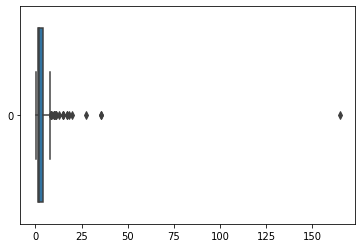

In [ ]:
# Boxplot u gotta specify the data = or else the error will happen again

# you can see the outlier here that its unit price is higher than other products
# but that doesnt mean that it always wrong tho
sns.boxplot(data=dt_pd_subset["UnitPrice"],orient='h')

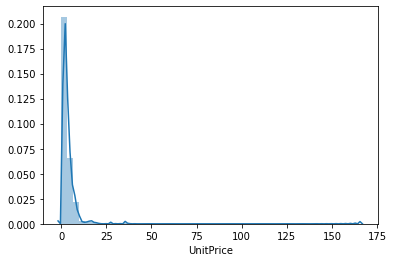

In [ ]:
# Histogram/ distplot = distribution plot

# from here you can see that the majority of the unit price are around 0
# which we can deduce that the products sell in this particular shop are affordable for everyone
sns.distplot(dt_pd_subset['UnitPrice']) 
plt.show()

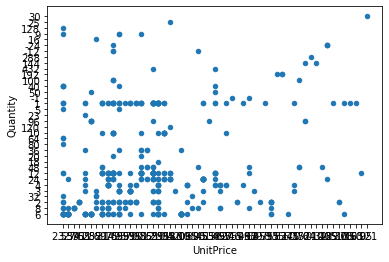

In [ ]:
# Scatterplot = use for determine the correlation btw two variables
dt_pd_subset.plot.scatter('UnitPrice', 'Quantity') # so 2 variables as an input here 

#### Create interactive chart

In [ ]:
# Plotly - interactive chart สามารถ save as png, zoom in out อะไรได้เยอะแยะเลย
import plotly.express as px
fig = px.scatter(dt_pd_subset, 'UnitPrice', 'Quantity')
fig.show() # มี.show() เหมือน spark เลย ซึ่งแปลว่าเราสามารถทำอะไรต่างๆได้ก่อนที่จะ show นั่นเอง

### Type Conversion

Convert `InvoiceDate` from string -> date

In [ ]:
# Show top 5 rows
dt.show(5)

+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|    InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|1/12/2018 08:26|     2.55|   17850.0|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|1/12/2018 08:26|     3.39|   17850.0|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|1/12/2018 08:26|     2.75|   17850.0|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|1/12/2018 08:26|     3.39|   17850.0|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|1/12/2018 08:26|     3.39|   17850.0|United Kingdom|
+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
only showing top 5 rows



In [ ]:
# Show Schema
dt.printSchema()

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: string (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: string (nullable = true)
 |-- CustomerID: string (nullable = true)
 |-- Country: string (nullable = true)



Is the date DD/MM/YYYY or MM/DD/YYYY? Let's find out



In [ ]:
# Show unique Invoice Date ดู distinct จะได้ดูภาพรวมว่ามันคือแบบdd/mm or mm/yy
dt.select("InvoiceDate").distinct().show()

+----------------+
|     InvoiceDate|
+----------------+
| 2/12/2018 11:23|
| 6/12/2018 13:41|
| 9/12/2018 14:44|
|13/12/2018 13:09|
|13/12/2018 16:46|
|14/12/2018 10:28|
|21/12/2018 15:13|
|  7/1/2019 15:19|
| 12/1/2019 09:48|
| 14/1/2019 14:28|
| 19/1/2019 14:43|
| 26/1/2019 17:15|
|  1/2/2019 10:04|
|  1/2/2019 12:53|
|  3/2/2019 11:30|
|  7/2/2019 14:51|
| 14/2/2019 12:36|
| 14/2/2019 13:11|
| 24/2/2019 09:05|
| 25/2/2019 13:56|
+----------------+
only showing top 20 rows



In [ ]:
# แปลง string เป็น date
from pyspark.sql import functions as f

# dt_temp = dt.withColumn('InvoiceDateTime', functions.to_date(
#     functions.unix_timestamp('InvoiceDate', 'dd/MM/yyyy HH:mm').cast('timestamp')
# ))

dt_temp = dt.withColumn('InvoiceDateTime',  # withColumn means create new column cos spark dont allow us to make changes to the existing data
    f.unix_timestamp('InvoiceDate', 'dd/MM/yyyy HH:mm').cast('timestamp')
)
dt_temp.show()

+---------+---------+--------------------+--------+---------------+---------+----------+--------------+-------------------+
|InvoiceNo|StockCode|         Description|Quantity|    InvoiceDate|UnitPrice|CustomerID|       Country|    InvoiceDateTime|
+---------+---------+--------------------+--------+---------------+---------+----------+--------------+-------------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|1/12/2018 08:26|     2.55|   17850.0|United Kingdom|2018-12-01 08:26:00|
|   536365|    71053| WHITE METAL LANTERN|       6|1/12/2018 08:26|     3.39|   17850.0|United Kingdom|2018-12-01 08:26:00|
|   536365|   84406B|CREAM CUPID HEART...|       8|1/12/2018 08:26|     2.75|   17850.0|United Kingdom|2018-12-01 08:26:00|
|   536365|   84029G|KNITTED UNION FLA...|       6|1/12/2018 08:26|     3.39|   17850.0|United Kingdom|2018-12-01 08:26:00|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|1/12/2018 08:26|     3.39|   17850.0|United Kingdom|2018-12-01 08:26:00|
|   5363

In [ ]:
dt_temp.printSchema() # new column appears

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: string (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: string (nullable = true)
 |-- CustomerID: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- InvoiceDateTime: timestamp (nullable = true)



In [ ]:
dt_final = dt_temp.drop('InvoiceDate')
dt_final.show()

+---------+---------+--------------------+--------+---------+----------+--------------+-------------------+
|InvoiceNo|StockCode|         Description|Quantity|UnitPrice|CustomerID|       Country|    InvoiceDateTime|
+---------+---------+--------------------+--------+---------+----------+--------------+-------------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|     2.55|   17850.0|United Kingdom|2018-12-01 08:26:00|
|   536365|    71053| WHITE METAL LANTERN|       6|     3.39|   17850.0|United Kingdom|2018-12-01 08:26:00|
|   536365|   84406B|CREAM CUPID HEART...|       8|     2.75|   17850.0|United Kingdom|2018-12-01 08:26:00|
|   536365|   84029G|KNITTED UNION FLA...|       6|     3.39|   17850.0|United Kingdom|2018-12-01 08:26:00|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|     3.39|   17850.0|United Kingdom|2018-12-01 08:26:00|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|     7.65|   17850.0|United Kingdom|2018-12-01 08:26:00|
|   536365|    21730|GLASS S

In [ ]:
dt_final.printSchema() # the InvoiceDate column is gone cos we drop it and save in the new variable (dt_final)

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: string (nullable = true)
 |-- UnitPrice: string (nullable = true)
 |-- CustomerID: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- InvoiceDateTime: timestamp (nullable = true)



## Data Cleansing with Spark

### Anomalies Check

#### Syntactical Anomalies
**Lexical errors** เช่น พิมพ์ผิด

In [1]:
# Check country distinct values. Find something interesting?
# ลองมาดูชื่อประเทศกัน เจออะไรบ้าง ?
dt_final.select("Country").distinct().show()

NameError: ignored

In [2]:
dt_final.where(dt_final['Country'] == 'EIREs').show()

NameError: ignored

In [ ]:
# เปลี่ยน EIREs เป็น EIRE
from pyspark.sql.functions import when # เลิ้บ when คัฟฟฟ

dt_temp_eire = dt_final.withColumn("CountryUpdate", when(dt_final['Country'] == 'EIREs', 'EIRE').otherwise(dt_final['Country']))

In [ ]:
# Check the result
dt_temp_eire.select("CountryUpdate").distinct().show()

In [ ]:
# Create final Dataframe
dt_final_eire = dt_temp_eire.drop("Country").withColumnRenamed('CountryUpdate', 'Country')

In [ ]:
dt_final_eire.show()

#### Semantic Anomalies

**Integrity constraints**: ค่าอยู่นอกเหนือขอบเขตของค่าที่รับได้ เช่น
- Stockcode: ค่าจะต้องเป็นตัวเลข 5 ตัว และ ต้อง unique ด้วย

In [ ]:
dt_final_eire.select("Stockcode").show(100)

In [ ]:
dt_final_eire.count()

In [ ]:
# filter คือเลือกข้อมูลตามเงื่อนไข
# rlike = regex + LIKE in SQL 
dt_final_eire.filter(dt_final_eire["Stockcode"].rlike("^[0-9]{5}$")).count() # regex here means ตัวเลข 0~9 ตัวไหนก็ได้ 5 ตัว $ แบบว่าจบห้ามมีต่อ

In [ ]:
# ลองดูข้อมูลที่ถูกต้อง
dt_final_eire.filter(dt_final_eire["Stockcode"].rlike("^[0-9]{5}$")).show(5)

In [ ]:
# ลองดูข้อมูลที่ไม่ถูกต้อง
dt_correct_stockcode = dt_final_eire.filter(dt_final_eire["Stockcode"].rlike("^[0-9]{5}$"))
dt_incorrect_stockcode = dt_final_eire.subtract(dt_correct_stockcode)

dt_incorrect_stockcode.show(10) # ข้อมูลที่ไม่ถูกต้องก็มาในรูปแบบ InvoiceNo 6 หลักทั้งนั้นเลยย

> Stock Code stores incorrect pattern of data therefore we need to convert into usable format


In [ ]:
# ลบตัวอักษรตัวสุดท้ายออกจาก stock code
from pyspark.sql.functions import regexp_replace # ทำการ search แล้วลบทิ้ง regex ที่เราเลือกมา

#ก็คือเพิ่ม column ใหม่ชื่อ stockcodeupdate จากการที่ regex ที่เอา A-Z ออกมาจาก dt_final_eire แล้วแทนด้วย ''
#dt_final_eire = og data ที่ทำให้ country name correct แล้ว
dt_temp_stockcode = dt_final_eire.withColumn("StockcodeUpdate", regexp_replace(dt_final_eire['Stockcode'], r'[A-Z]', '')) 

In [ ]:
# Check the result
dt_temp_stockcode.show()

In [ ]:
# Create final Dataframe
dt_final_stockcode = dt_temp_stockcode.drop("Stockcode").withColumnRenamed('StockcodeUpdate', 'StockCode')

In [ ]:
dt_final_stockcode.show(4)

#### Missing values

การเช็คและแก้ไข Missing Values (หากจำเป็น)

In [ ]:
# Check จำนวน missing values ในแต่ละ column
from pyspark.sql.functions import col,sum

# list comprehension right here => read from right to left
# so basically we're trying to sum all the col c (from the for loop on the right), select only null values (returns in T/F) and cast it into int
# .alias is for naming the column
dt_final_stockcode.select(*[sum(col(c).isNull().cast("int")).alias(c) for c in dt_final_stockcode.columns]).show()

In [ ]:
# Check ว่ามีแถวไหนที่ description เป็น null บ้าง

# although there're many quantity in each row but as long as unit price = 0 
# then it doesnt really affect the data cos when they multiply each other the result always = 0
# which means we could actually delete it in some case?
dt_final_stockcode.where( dt_final_stockcode['Description'].isNull() ).show()

In [ ]:
# Check ว่ามีแถวไหนที่ customerID เป็น null บ้าง

# we might actually ask the data owner but we can actually assume that the customers whose customerID IS NULL are bc they only buy it once like w/o loggin in?
# but it doesnt really affect the overall sales anyway
dt_final_stockcode.where( dt_final_stockcode['customerID'].isNull() ).show()

### Replace NULL Customer ID with -1

In [ ]:
# Write code here
dt_customer_notnull = dt_final_stockcode.withColumn("CustomerIDUpdate", when(dt_final_stockcode['customerID'].isNull(), -1).otherwise(dt_final_stockcode['customerID']))

dt_customer_notnull.show()

+---------+--------------------+--------+---------+----------+-------------------+--------------+---------+----------------+
|InvoiceNo|         Description|Quantity|UnitPrice|CustomerID|    InvoiceDateTime|       Country|StockCode|CustomerIDUpdate|
+---------+--------------------+--------+---------+----------+-------------------+--------------+---------+----------------+
|   536365|WHITE HANGING HEA...|       6|     2.55|   17850.0|2018-12-01 08:26:00|United Kingdom|    85123|         17850.0|
|   536365| WHITE METAL LANTERN|       6|     3.39|   17850.0|2018-12-01 08:26:00|United Kingdom|    71053|         17850.0|
|   536365|CREAM CUPID HEART...|       8|     2.75|   17850.0|2018-12-01 08:26:00|United Kingdom|    84406|         17850.0|
|   536365|KNITTED UNION FLA...|       6|     3.39|   17850.0|2018-12-01 08:26:00|United Kingdom|    84029|         17850.0|
|   536365|RED WOOLLY HOTTIE...|       6|     3.39|   17850.0|2018-12-01 08:26:00|United Kingdom|    84029|         17850.0|


### Data Cleansing with Spark SQL

**Filter data from `unitPrice` & `Quantity` column where value > 0**

In [ ]:
dt_final_stockcode.createOrReplaceTempView("sales") # will replace if it already exists
dt_sql = spark.sql("SELECT * FROM sales")
dt_sql.show()

+---------+--------------------+--------+---------+----------+-------------------+--------------+---------+
|InvoiceNo|         Description|Quantity|UnitPrice|CustomerID|    InvoiceDateTime|       Country|StockCode|
+---------+--------------------+--------+---------+----------+-------------------+--------------+---------+
|   536365|WHITE HANGING HEA...|       6|     2.55|   17850.0|2018-12-01 08:26:00|United Kingdom|    85123|
|   536365| WHITE METAL LANTERN|       6|     3.39|   17850.0|2018-12-01 08:26:00|United Kingdom|    71053|
|   536365|CREAM CUPID HEART...|       8|     2.75|   17850.0|2018-12-01 08:26:00|United Kingdom|    84406|
|   536365|KNITTED UNION FLA...|       6|     3.39|   17850.0|2018-12-01 08:26:00|United Kingdom|    84029|
|   536365|RED WOOLLY HOTTIE...|       6|     3.39|   17850.0|2018-12-01 08:26:00|United Kingdom|    84029|
|   536365|SET 7 BABUSHKA NE...|       2|     7.65|   17850.0|2018-12-01 08:26:00|United Kingdom|    22752|
|   536365|GLASS STAR FROSTE

In [ ]:
dt_sql_count = spark.sql("SELECT count(*) as cnt_row FROM sales")
dt_sql_count.show()

+-------+
|cnt_row|
+-------+
| 149561|
+-------+



In [ ]:
dt_sql_count = spark.sql("SELECT count(*) as cnt_row, country FROM sales GROUP BY Country ORDER BY cnt_row DESC")
dt_sql_count.show()

+-------+---------------+
|cnt_row|        country|
+-------+---------------+
| 137809| United Kingdom|
|   2415|        Germany|
|   2157|         France|
|   1791|           EIRE|
|    764|          Spain|
|    696|    Netherlands|
|    464|        Belgium|
|    413|       Portugal|
|    370|    Switzerland|
|    365|      Australia|
|    304|         Cyprus|
|    268|          Italy|
|    264|        Finland|
|    241|Channel Islands|
|    212|         Norway|
|    211|          Japan|
|    118|      Singapore|
|    110|         Sweden|
|     98|         Poland|
|     84|        Iceland|
+-------+---------------+
only showing top 20 rows



In [ ]:
dt_sql_valid_price = spark.sql("SELECT count(*) as cnt_row FROM sales WHERE UnitPrice > 0 AND Quantity > 0")
dt_sql_valid_price.show()

+-------+
|cnt_row|
+-------+
| 119020|
+-------+



In [ ]:
dt_sql_valid_price = spark.sql("SELECT * FROM sales WHERE UnitPrice > 0 AND Quantity > 0")
dt_sql_valid_price.show()

+---------+--------------------+--------+---------+----------+-------------------+--------------+---------+
|InvoiceNo|         Description|Quantity|UnitPrice|CustomerID|    InvoiceDateTime|       Country|StockCode|
+---------+--------------------+--------+---------+----------+-------------------+--------------+---------+
|   536365|WHITE HANGING HEA...|       6|     2.55|   17850.0|2018-12-01 08:26:00|United Kingdom|    85123|
|   536365| WHITE METAL LANTERN|       6|     3.39|   17850.0|2018-12-01 08:26:00|United Kingdom|    71053|
|   536365|CREAM CUPID HEART...|       8|     2.75|   17850.0|2018-12-01 08:26:00|United Kingdom|    84406|
|   536365|KNITTED UNION FLA...|       6|     3.39|   17850.0|2018-12-01 08:26:00|United Kingdom|    84029|
|   536365|RED WOOLLY HOTTIE...|       6|     3.39|   17850.0|2018-12-01 08:26:00|United Kingdom|    84029|
|   536365|SET 7 BABUSHKA NE...|       2|     7.65|   17850.0|2018-12-01 08:26:00|United Kingdom|    22752|
|   536365|GLASS STAR FROSTE

1. Display sales information from USA and InvoiceDateTime starts from 2010-12-01 onwards with UnitPrice > 3.5 
2. Display boxes' sales information from France that has InvoiceDateTime from 2010-12-05 onwards and UnitPrice > 5.5 

In [ ]:
# somehow the data in OnlineRetailWS2.csv that I received have lesser amount of row, therefore, the USA doesnt exist anywhere
dt_sql_wan = spark.sql("SELECT * FROM sales where InvoiceDateTime >= '2010-12-01' AND UnitPrice > 3.5 AND Country = 'France'")
dt_sql_wan.show()

+---------+--------------------+--------+---------+----------+-------------------+-------+---------+
|InvoiceNo|         Description|Quantity|UnitPrice|CustomerID|    InvoiceDateTime|Country|StockCode|
+---------+--------------------+--------+---------+----------+-------------------+-------+---------+
|   536370|ALARM CLOCK BAKEL...|      24|     3.75|   12583.0|2018-12-01 08:45:00| France|    22728|
|   536370|ALARM CLOCK BAKEL...|      24|     3.75|   12583.0|2018-12-01 08:45:00| France|    22727|
|   536370|ALARM CLOCK BAKEL...|      12|     3.75|   12583.0|2018-12-01 08:45:00| France|    22726|
|   536370|VINTAGE SEASIDE J...|      12|     3.75|   12583.0|2018-12-01 08:45:00| France|    21913|
|   536370|             POSTAGE|       3|     18.0|   12583.0|2018-12-01 08:45:00| France|         |
|   536852|             POSTAGE|       1|     18.0|   12686.0|2018-12-03 09:51:00| France|         |
|   536974|EDWARDIAN PARASOL...|       9|     5.95|   12682.0|2018-12-03 13:59:00| France| 

In [ ]:
# TODO: Country USA ที่มี InvoiceDateTime ตั้งแต่วันที่ 2010-12-01 เป็นต้นไป และ UnitPrice เกิน 3.5
dt_sql_usa = spark.sql("""
SELECT * FROM sales
  WHERE InvoiceDateTime >= '2010-12-01'
  AND UnitPrice > 3.5
  AND Country='USA'
""").show()

+---------+-----------+--------+---------+----------+---------------+-------+---------+
|InvoiceNo|Description|Quantity|UnitPrice|CustomerID|InvoiceDateTime|Country|StockCode|
+---------+-----------+--------+---------+----------+---------------+-------+---------+
+---------+-----------+--------+---------+----------+---------------+-------+---------+



In [ ]:
# TODO: Country France ที่มี InvoiceDateTime ตังแต่วันที่ 2010-12-05 เป็นต้นไป และ UnitPrice เกิน 5.5 และ Description มีคำว่า Box
dt_sql_france = spark.sql("""
SELECT * FROM sales
  WHERE UnitPrice > 5.5
  AND InvoiceDateTime >= '2010-12-05'
  AND Country = 'France'
  AND LOWER(Description) LIKE '%box%'
""").show()

+---------+--------------------+--------+---------+----------+-------------------+-------+---------+
|InvoiceNo|         Description|Quantity|UnitPrice|CustomerID|    InvoiceDateTime|Country|StockCode|
+---------+--------------------+--------+---------+----------+-------------------+-------+---------+
|   537065|ROSE COTTAGE KEEP...|       8|      8.5|   12567.0|2018-12-05 11:57:00| France|    22968|
|   537065|  TOOL BOX SOFT TOY |       6|     8.95|   12567.0|2018-12-05 11:57:00| France|    21055|
|   537463|BOOM BOX SPEAKER ...|       4|     5.95|   12681.0|2018-12-07 10:08:00| France|    21064|
|   537897|SET 7 BABUSHKA NE...|       2|      8.5|   12683.0|2018-12-09 10:37:00| France|    22752|
|   539607|BOOM BOX SPEAKER ...|       4|     5.95|   12681.0|2018-12-20 14:10:00| France|    21065|
|   540178|BOOM BOX SPEAKER ...|       2|     5.95|   12681.0|2019-01-05 12:42:00| France|    21064|
|   540351|  TOOL BOX SOFT TOY |       1|     8.95|   12735.0|2019-01-06 14:26:00| France| 

## Save cleaned data to CSV format


In [ ]:
# Normally Spark would save into multiple files as it sent out to multiple processors to run the files
# Write as partitioned files (use multiple workers)

dt_sql_valid_price.write.csv('Cleaned_Data_Now_Final.csv')

In [ ]:
# But we also can force Spark to save data all in one file as well
# Write as 1 file (use single worker) coalesce will do the job to consolidate all data from different workers into a single file

dt_sql_valid_price.coalesce(1).write.csv('Cleaned_Data_Now_Final_Single.csv')

### Read Partitioned Files
e.g.
- /content/Cleaned_Data.csv/part-00000-25a1e27a-a2b1-4553-b8ae-e05a6c574b59-c000.csv
- /content/Cleaned_Data.csv/part-00001-25a1e27a-a2b1-4553-b8ae-e05a6c574b59-c000.csv

The name of your file will be autogenerated

In [ ]:
# Read first csv file
part1 = spark.read.csv('/content/Cleaned_Data_Now_Final.csv/part-00000-7c867eca-982b-4ffd-9709-22c85a82a1bc-c000.csv', header = True, inferSchema = True, )
part1.count()

80313

In [ ]:
# Read second csv file
part2 = spark.read.csv('/content/Cleaned_Data_Now_Final.csv/part-00001-7c867eca-982b-4ffd-9709-22c85a82a1bc-c000.csv', header = True, inferSchema = True, )
part2.count()

38705

In [ ]:
# Read all csv file in this particular folder
all_parts = spark.read.csv('/content/Cleaned_Data_Now_Final.csv/part-*.csv', header = True, inferSchema = True, )

In [ ]:
all_parts.count()

119018

In [3]:
!git init

Initialized empty Git repository in /content/.git/


In [4]:
!git config — global user.email “You@Your.com”
!git config — global user.name “Username”

usage: git config [<options>]

Config file location
    --global              use global config file
    --system              use system config file
    --local               use repository config file
    -f, --file <file>     use given config file
    --blob <blob-id>      read config from given blob object

Action
    --get                 get value: name [value-regex]
    --get-all             get all values: key [value-regex]
    --get-regexp          get values for regexp: name-regex [value-regex]
    --get-urlmatch        get value specific for the URL: section[.var] URL
    --replace-all         replace all matching variables: name value [value_regex]
    --add                 add a new variable: name value
    --unset               remove a variable: name [value-regex]
    --unset-all           remove all matches: name [value-regex]
    --rename-section      rename section: old-name new-name
    --remove-section      remove a section: name
    -l, --list            list all
 

In [5]:
!git add -A

In [7]:
!git commit -m “DataCleansingwithSpark”


*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@e4a57f7b9d49.(none)')


In [9]:
!git config --global user.email "wan_anantaya@hotmail.com"
!git config --global user.name "sadbacon1148"

In [10]:
!git commit -m “DataCleansingwithSpark”

[master (root-commit) 20dad6e] “DataCleansingwithSpark”
 20 files changed, 50715 insertions(+)
 create mode 100644 .config/.last_opt_in_prompt.yaml
 create mode 100644 .config/.last_survey_prompt.yaml
 create mode 100644 .config/.last_update_check.json
 create mode 100644 .config/.metricsUUID
 create mode 100644 .config/active_config
 create mode 100644 .config/config_sentinel
 create mode 100644 .config/configurations/config_default
 create mode 100644 .config/gce
 create mode 100644 .config/logs/2020.09.16/16.27.53.559887.log
 create mode 100644 .config/logs/2020.09.16/16.28.12.223468.log
 create mode 100644 .config/logs/2020.09.16/16.28.26.331600.log
 create mode 100644 .config/logs/2020.09.16/16.28.31.779869.log
 create mode 100644 .config/logs/2020.09.16/16.28.46.906775.log
 create mode 100644 .config/logs/2020.09.16/16.28.47.613155.log
 create mode 100755 sample_data/README.md
 create mode 100755 sample_data/anscombe.json
 create mode 100644 sample_data/california_housing_test.cs